**Data set link** [Face Mask](https://www.kaggle.com/ashishjangra27/face-mask-12k-images-dataset)

In [ ]:
!pip install kaggle
from google.colab import files
files.upload()
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Saving kaggle.json to kaggle (2).json


In [ ]:
import os 
import zipfile 
import tensorflow as tf
from tensorflow import keras
from keras import preprocessing
import matplotlib.pyplot as plt
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
print(tf.__version__)

2.8.2


In [ ]:
!kaggle datasets download -d ashishjangra27/face-mask-12k-images-dataset

face-mask-12k-images-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
local_dir='/content/face-mask-12k-images-dataset.zip'
zip_ref=zipfile.ZipFile(local_dir,'r')
zip_ref.extractall('/tmp')
zip_ref.close

<bound method ZipFile.close of <zipfile.ZipFile filename='/content/face-mask-12k-images-dataset.zip' mode='r'>>

In [ ]:
train_dir=os.path.join('/tmp/Face Mask Dataset/Train')
validation_dir=os.path.join('/tmp/Face Mask Dataset/Validation')
test_dir=os.path.join('/tmp/Face Mask Dataset/Test')

In [ ]:
from keras import backend as K

def recall_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def precision_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

Model 1: CNN

In [ ]:
model=keras.models.Sequential([
                               keras.layers.Conv2D(32,(3,3),activation='relu',padding='valid',input_shape=(150,150,3)),
                               keras.layers.MaxPool2D(pool_size=(2,2)),
                               keras.layers.Conv2D(64,(3,2),activation='relu',padding='valid'),
                               keras.layers.MaxPool2D(pool_size=(2,2)),
                               keras.layers.Conv2D(128,(3,3),activation='relu',padding='valid'),
                               keras.layers.MaxPool2D(pool_size=(2,2)),
                               keras.layers.Conv2D(256,(3,3),activation='relu',padding='valid'),
                               keras.layers.MaxPool2D(pool_size=(2,2)),
                               keras.layers.Conv2D(512,(3,3),activation='relu',padding='valid'),
                               keras.layers.MaxPool2D(pool_size=(2,2)),
                               
                              
                           
                              tf.keras.layers.Dropout(0.5),
                               
                               
                               keras.layers.Flatten(),
                               keras.layers.Dense(units=512,activation=tf.nn.relu),
                               
                               keras.layers.Dense(units=256,activation=tf.nn.relu),
                               
                               keras.layers.Dense(units=128,activation=tf.nn.relu),
                               
                               keras.layers.Dense(units=64,activation=tf.nn.relu),

                               keras.layers.Dense(units=32,activation=tf.nn.relu),
                               
                               
                               keras.layers.Dense(units=1,activation=tf.nn.sigmoid)
])

model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(lr=1e-4),
             metrics=['accuracy', f1_m,precision_m, recall_m])


model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_109 (Conv2D)         (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_19 (MaxPoolin  (None, 74, 74, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_110 (Conv2D)         (None, 72, 73, 64)        12352     
                                                                 
 max_pooling2d_20 (MaxPoolin  (None, 36, 36, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_111 (Conv2D)         (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_21 (MaxPoolin  (None, 17, 17, 128)     

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/rmsprop.py:130: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


In [ ]:
train_data_generator=ImageDataGenerator(
      rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.3,
      horizontal_flip=True,
      fill_mode='nearest')
validation_data_generator=ImageDataGenerator(
     rescale=1./255
)
test_data_generator=ImageDataGenerator(
     rescale=1./255
)
train_generator = train_data_generator.flow_from_directory(train_dir,
                                                    batch_size=200,
                                                    class_mode='binary',
                                                    target_size=(150,150)) 
validation_generator =validation_data_generator.flow_from_directory(validation_dir,
                                                         batch_size=80,
                                                         class_mode  = 'binary',
                                                         target_size = (150,150))
test_generator =test_data_generator.flow_from_directory(test_dir,
                                                         batch_size=80,
                                                         class_mode  = 'binary',
                                                         target_size = (150,150))

Found 10000 images belonging to 2 classes.
Found 800 images belonging to 2 classes.
Found 992 images belonging to 2 classes.


In [ ]:
history = model.fit(train_generator,
                              validation_data=validation_generator,
                              steps_per_epoch=20,
                              epochs=20,
                              validation_steps=10,
                              verbose=1)

Epoch 1/20
20/20 [==============================] - 27s 1s/step - loss: 0.6435 - accuracy: 0.6410 - f1_m: 0.5450 - precision_m: 0.6361 - recall_m: 0.5962 - val_loss: 0.4759 - val_accuracy: 0.8188 - val_f1_m: 0.8020 - val_precision_m: 0.8878 - val_recall_m: 0.7329
Epoch 2/20
20/20 [==============================] - 26s 1s/step - loss: 0.4171 - accuracy: 0.8313 - f1_m: 0.8335 - precision_m: 0.8261 - recall_m: 0.8614 - val_loss: 0.3377 - val_accuracy: 0.8600 - val_f1_m: 0.8532 - val_precision_m: 0.8955 - val_recall_m: 0.8215
Epoch 3/20
20/20 [==============================] - 26s 1s/step - loss: 0.3574 - accuracy: 0.8522 - f1_m: 0.8560 - precision_m: 0.8340 - recall_m: 0.8953 - val_loss: 0.2382 - val_accuracy: 0.9212 - val_f1_m: 0.9222 - val_precision_m: 0.8923 - val_recall_m: 0.9558
Epoch 4/20
20/20 [==============================] - 26s 1s/step - loss: 0.3122 - accuracy: 0.8745 - f1_m: 0.8755 - precision_m: 0.8611 - recall_m: 0.9015 - val_loss: 0.2314 - val_accuracy: 0.9162 - val_f1_m: 

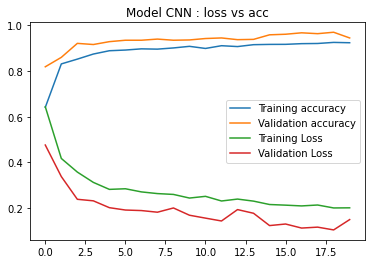

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc,  label='Training accuracy')
plt.plot(epochs, val_acc, label='Validation accuracy')

plt.plot(epochs, loss,  label='Training Loss')
plt.plot(epochs, val_loss,  label='Validation Loss')
plt.title('Model CNN : loss vs acc')
plt.legend()

plt.show()

In [ ]:
scores = model.evaluate(test_generator, verbose=1)
print("Accuracy: %.2f%%" % (scores[1]*100))

13/13 [==============================] - 2s 126ms/step - loss: 0.1601 - accuracy: 0.9435 - f1_m: 0.9445 - precision_m: 0.9758 - recall_m: 0.9165
Accuracy: 94.35%


In [ ]:
scores = model.evaluate(test_generator, verbose=1)
print(scores)
print("Accuracy: %.2f%%" % (scores[1]*100))
print("F1-Score: %.2f%%" % (scores[2]*100))
print("Precision: %.2f%%" % (scores[3]*100))
print("Recall: %.2f%%" % (scores[4]*100))

13/13 [==============================] - 2s 121ms/step - loss: 0.1601 - accuracy: 0.9435 - f1_m: 0.9434 - precision_m: 0.9732 - recall_m: 0.9179
[0.16005373001098633, 0.9435483813285828, 0.943414568901062, 0.9732338786125183, 0.9178597927093506]
Accuracy: 94.35%
F1-Score: 94.34%
Precision: 97.32%
Recall: 91.79%


Saving Ema_mask.jpg to Ema_mask (1).jpg
[0.]
Ema_mask.jpg is With Mask


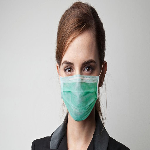

In [ ]:
import numpy as np
from google.colab import files
from keras.preprocessing import image
from IPython.display import Image
import cv2
from google.colab.patches import cv2_imshow

uploaded = files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path = '/content/' + fn
  img = image.load_img(path, target_size=(150, 150))
  
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  print(classes[0])
  if classes[0]>0.5:
    temp_path='/content/' + fn
    print(fn + " is Without Mask")
    img = cv2.imread(temp_path)
    imS=cv2.resize(img, (150, 150))
    cv2_imshow(imS)
  else:
    temp_path='/content/' + fn
    print(fn + " is With Mask")
    img = cv2.imread(temp_path)
    imS=cv2.resize(img, (150, 150))
    cv2_imshow(imS)


In [ ]:
model.save_weights("Facemask.h5")

Model 2: VGG16

In [ ]:
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input

INPUT_SIZE = [128,128]
BATCH = 32

vgg16 = VGG16(input_shape=INPUT_SIZE + [3], weights='imagenet', include_top=False)
for layer in vgg16.layers:
    layer.trainable = False

flatten = Flatten()(vgg16.output)
dense_1 = Dense(units=500, activation='relu')(flatten)
dense_2 = Dense(units=500, activation='relu')(dense_1)
dense_3 = Dense(units=100, activation='relu')(dense_2)
dense_4 = Dense(units=100, activation='relu')(dense_3)
dense_output = Dense(units=1, activation='sigmoid')(dense_4)

model2 = Model(inputs=vgg16.input, outputs=dense_output)
model2.compile(
  loss='binary_crossentropy',
  optimizer='adam',
  metrics=['accuracy', f1_m,precision_m, recall_m]
)
model2.summary()


Model: "model_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_15 (InputLayer)       [(None, 128, 128, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 128, 128, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 128, 128, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 64, 64, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 64, 64, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 64, 64, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 32, 32, 128)       0  

In [ ]:
train_data_generator_vgg=ImageDataGenerator(
      rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.3,
      horizontal_flip=True,
      fill_mode='nearest')
validation_data_generator_vgg=ImageDataGenerator(
     rescale=1./255
)
test_data_generator_vgg=ImageDataGenerator(
     rescale=1./255
     
)
train_generator_vgg = train_data_generator_vgg.flow_from_directory(train_dir,
                                                    batch_size=BATCH,
                                                    class_mode='binary',
                                                    target_size=INPUT_SIZE) 
validation_generator_vgg =validation_data_generator_vgg.flow_from_directory(validation_dir,
                                                         batch_size=BATCH,
                                                         class_mode  = 'binary',
                                                         target_size = INPUT_SIZE)
test_generator_vgg =test_data_generator_vgg.flow_from_directory(test_dir,shuffle = False,
                                                         batch_size=BATCH,
                                                         class_mode  = 'binary',
                                                         target_size = INPUT_SIZE)

Found 10000 images belonging to 2 classes.
Found 800 images belonging to 2 classes.
Found 992 images belonging to 2 classes.


In [ ]:
history2= model2.fit(train_generator_vgg,
                              validation_data=validation_generator_vgg,
                              steps_per_epoch=20,
                              epochs=20,
                              validation_steps=10,
                              verbose=1)

Epoch 1/20
20/20 [==============================] - 6s 239ms/step - loss: 0.3928 - accuracy: 0.8203 - f1_m: 0.7495 - precision_m: 0.7623 - recall_m: 0.7713 - val_loss: 0.1549 - val_accuracy: 0.9500 - val_f1_m: 0.9497 - val_precision_m: 0.9109 - val_recall_m: 0.9952
Epoch 2/20
20/20 [==============================] - 4s 204ms/step - loss: 0.1994 - accuracy: 0.9250 - f1_m: 0.9205 - precision_m: 0.9357 - recall_m: 0.9179 - val_loss: 0.0653 - val_accuracy: 0.9781 - val_f1_m: 0.9780 - val_precision_m: 0.9747 - val_recall_m: 0.9830
Epoch 3/20
20/20 [==============================] - 4s 199ms/step - loss: 0.1473 - accuracy: 0.9422 - f1_m: 0.9400 - precision_m: 0.9391 - recall_m: 0.9450 - val_loss: 0.0479 - val_accuracy: 0.9781 - val_f1_m: 0.9707 - val_precision_m: 1.0000 - val_recall_m: 0.9470
Epoch 4/20
20/20 [==============================] - 4s 198ms/step - loss: 0.1218 - accuracy: 0.9500 - f1_m: 0.9494 - precision_m: 0.9604 - recall_m: 0.9443 - val_loss: 0.0313 - val_accuracy: 0.9906 - va

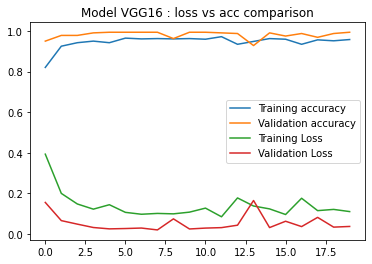

In [ ]:
acc = history2.history['accuracy']
val_acc = history2.history['val_accuracy']
loss = history2.history['loss']
val_loss = history2.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc,  label='Training accuracy')
plt.plot(epochs, val_acc, label='Validation accuracy')

plt.plot(epochs, loss,  label='Training Loss')
plt.plot(epochs, val_loss,  label='Validation Loss')
plt.title('Model VGG16 : loss vs acc comparison')
plt.legend()

plt.show()

In [ ]:
scores = model2.evaluate(test_generator_vgg, verbose=1)
print("Accuracy: %.2f%%" % (scores[1]*100))
print(scores)

31/31 [==============================] - 2s 69ms/step - loss: 0.0308 - accuracy: 0.9879 - f1_m: 0.5108 - precision_m: 0.5161 - recall_m: 0.5057
Accuracy: 98.79%
[0.030791210010647774, 0.9879032373428345, 0.5107687711715698, 0.5161290168762207, 0.5057355165481567]


In [ ]:
scores = model2.evaluate(test_generator_vgg, verbose=1)
print(scores)
print("Accuracy: %.2f%%" % (scores[1]*100))
print("F1-Score: %.2f%%" % (scores[2]*100))
print("Precision: %.2f%%" % (scores[3]*100))
print("Recall: %.2f%%" % (scores[4]*100))

31/31 [==============================] - 2s 67ms/step - loss: 0.0308 - accuracy: 0.9879 - f1_m: 0.5108 - precision_m: 0.5161 - recall_m: 0.5057
[0.030791210010647774, 0.9879032373428345, 0.5107687711715698, 0.5161290168762207, 0.5057355165481567]
Accuracy: 98.79%
F1-Score: 51.08%
Precision: 51.61%
Recall: 50.57%


Saving Ema_mask.jpg to Ema_mask (2).jpg
[0.]
Ema_mask.jpg is With Mask


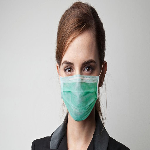

In [ ]:
import numpy as np
from google.colab import files
from keras.preprocessing import image
from IPython.display import Image
import cv2
from google.colab.patches import cv2_imshow

uploaded = files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path = '/content/' + fn
  img = image.load_img(path, target_size=(128, 128))
  
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model2.predict(images, batch_size=10)
  print(classes[0])
  if classes[0]>0.5:
    temp_path='/content/' + fn
    print(fn + " is Without Mask")
    img = cv2.imread(temp_path)
    imS=cv2.resize(img, (150, 150))
    cv2_imshow(imS)
  else:
    temp_path='/content/' + fn
    print(fn + " is With Mask")
    img = cv2.imread(temp_path)
    imS=cv2.resize(img, (150, 150))
    cv2_imshow(imS)


In [ ]:
model2.save('face_mask_vgg16.h5')

model 3: RESNET50

In [ ]:
from tensorflow.keras.models import Model
from tensorflow.keras.applications.resnet50 import ResNet50, preprocess_input

In [ ]:
INPUT_SIZE = [128,128]
BATCH = 32

resnet50 = ResNet50(
    input_shape = INPUT_SIZE + [3],
    weights = 'imagenet',
    include_top = False   
)
for layer in resnet50.layers:
    layer.trainable = False

flatten = Flatten()(resnet50.output)
dense_1 = Dense(units=500, activation='relu')(flatten)
dense_2 = Dense(units=500, activation='relu')(dense_1)
dense_3 = Dense(units=100, activation='relu')(dense_2)
dense_4 = Dense(units=100, activation='relu')(dense_3)
dense_output = Dense(units=1, activation='sigmoid')(dense_4)

model_resnet = Model(inputs=resnet50.input, outputs=dense_output) 
model_resnet.compile(
  loss='binary_crossentropy',
  optimizer='adam',
  metrics=['accuracy', f1_m,precision_m, recall_m]
)
model_resnet.summary()

Model: "model_13"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_16 (InputLayer)          [(None, 128, 128, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 134, 134, 3)  0           ['input_16[0][0]']               
                                                                                                  
 conv1_conv (Conv2D)            (None, 64, 64, 64)   9472        ['conv1_pad[0][0]']              
                                                                                                  
 conv1_bn (BatchNormalization)  (None, 64, 64, 64)   256         ['conv1_conv[0][0]']      

In [ ]:
train_data_generator_resnet=ImageDataGenerator(
      rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.3,
      horizontal_flip=True,
      fill_mode='nearest')
validation_data_generator_resnet=ImageDataGenerator(
     rescale=1./255
)
test_data_generator_resnet=ImageDataGenerator(
     rescale=1./255
     
)
train_generator_resnet = train_data_generator_resnet.flow_from_directory(train_dir,
                                                    batch_size=BATCH,
                                                    class_mode='binary',
                                                    target_size=INPUT_SIZE) 
validation_generator_resnet =validation_data_generator_resnet.flow_from_directory(validation_dir,
                                                         batch_size=BATCH,
                                                         class_mode  = 'binary',
                                                         target_size = INPUT_SIZE)
test_generator_resnet =test_data_generator_resnet.flow_from_directory(test_dir,shuffle = False,
                                                         batch_size=BATCH,
                                                         class_mode  = 'binary',
                                                         target_size = INPUT_SIZE)

Found 10000 images belonging to 2 classes.
Found 800 images belonging to 2 classes.
Found 992 images belonging to 2 classes.


In [ ]:
history3= model_resnet.fit(train_generator_resnet,
                              validation_data=validation_generator_resnet,
                              steps_per_epoch=20,
                              epochs=20,
                              validation_steps=10,
                              verbose=1)

Epoch 1/20
20/20 [==============================] - 10s 256ms/step - loss: 0.7319 - accuracy: 0.5016 - f1_m: 0.4622 - precision_m: 0.3552 - recall_m: 0.6771 - val_loss: 0.6833 - val_accuracy: 0.5719 - val_f1_m: 0.7150 - val_precision_m: 0.5582 - val_recall_m: 1.0000
Epoch 2/20
20/20 [==============================] - 4s 206ms/step - loss: 0.7075 - accuracy: 0.5531 - f1_m: 0.3477 - precision_m: 0.2824 - recall_m: 0.4742 - val_loss: 0.6852 - val_accuracy: 0.5469 - val_f1_m: 0.6925 - val_precision_m: 0.5353 - val_recall_m: 0.9955
Epoch 3/20
20/20 [==============================] - 4s 199ms/step - loss: 0.6874 - accuracy: 0.5406 - f1_m: 0.5761 - precision_m: 0.4944 - recall_m: 0.7535 - val_loss: 0.6753 - val_accuracy: 0.5531 - val_f1_m: 0.6299 - val_precision_m: 0.5247 - val_recall_m: 0.8071
Epoch 4/20
20/20 [==============================] - 4s 201ms/step - loss: 0.6619 - accuracy: 0.5688 - f1_m: 0.5316 - precision_m: 0.5515 - recall_m: 0.6245 - val_loss: 0.6808 - val_accuracy: 0.5562 - v

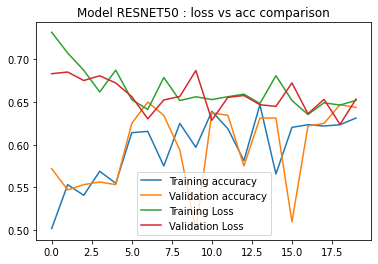

In [ ]:
acc = history3.history['accuracy']
val_acc = history3.history['val_accuracy']
loss = history3.history['loss']
val_loss = history3.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc,  label='Training accuracy')
plt.plot(epochs, val_acc, label='Validation accuracy')

plt.plot(epochs, loss,  label='Training Loss')
plt.plot(epochs, val_loss,  label='Validation Loss')
plt.title('Model RESNET50 : loss vs acc comparison')
plt.legend()

plt.show()

In [ ]:
scores = model_resnet.evaluate(test_generator_resnet, verbose=1)
print(scores)
print("Accuracy: %.2f%%" % (scores[1]*100))
print("F1-Score: %.2f%%" % (scores[2]*100))
print("Precision: %.2f%%" % (scores[3]*100))
print("Recall: %.2f%%" % (scores[4]*100))

31/31 [==============================] - 2s 61ms/step - loss: 0.6090 - accuracy: 0.7067 - f1_m: 0.3992 - precision_m: 0.5161 - recall_m: 0.3303
[0.6089966893196106, 0.7066532373428345, 0.3991905450820923, 0.5161290168762207, 0.3302975594997406]
Accuracy: 70.67%
F1-Score: 39.92%
Precision: 51.61%
Recall: 33.03%


Saving Ema_mask.jpg to Ema_mask (8).jpg
[6.5666725e-08]
Ema_mask.jpg is With Mask


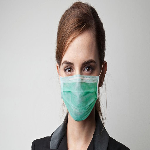

In [ ]:
import numpy as np
from google.colab import files
from keras.preprocessing import image
from IPython.display import Image
import cv2
from google.colab.patches import cv2_imshow

uploaded = files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path = '/content/' + fn
  img = image.load_img(path, target_size=(128, 128))
  
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model_resnet.predict(images, batch_size=10)
  print(classes[0])
  if classes[0]>0.5:
    temp_path='/content/' + fn
    print(fn + " is Without Mask")
    img = cv2.imread(temp_path)
    imS=cv2.resize(img, (150, 150))
    cv2_imshow(imS)
  else:
    temp_path='/content/' + fn
    print(fn + " is With Mask")
    img = cv2.imread(temp_path)
    imS=cv2.resize(img, (150, 150))
    cv2_imshow(imS)


In [ ]:
model_resnet.save('face_mask_resnet50.h5')

Model 4: InceptionV3

In [ ]:
from keras.applications.inception_v3 import preprocess_input
from keras.applications.inception_v3 import InceptionV3

In [ ]:
INPUT_SIZE = [128,128]
BATCH = 32

inception = InceptionV3(
    input_shape = INPUT_SIZE + [3],
    weights = 'imagenet',
    include_top = False   
)
for layer in inception.layers:
    layer.trainable = False

flatten = Flatten()(inception.output)
dense_1 = Dense(units=500, activation='relu')(flatten)
dense_2 = Dense(units=500, activation='relu')(dense_1)
dense_3 = Dense(units=100, activation='relu')(dense_2)
dense_4 = Dense(units=100, activation='relu')(dense_3)
dense_output = Dense(units=1, activation='sigmoid')(dense_4)

model_inception = Model(inputs=inception.input, outputs=dense_output) 
model_inception.compile(
  loss='binary_crossentropy',
  optimizer='adam',
  metrics=['accuracy', f1_m,precision_m, recall_m]
)
model_inception.summary()


Model: "model_14"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_17 (InputLayer)          [(None, 128, 128, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_114 (Conv2D)            (None, 63, 63, 32)   864         ['input_17[0][0]']               
                                                                                                  
 batch_normalization_94 (BatchN  (None, 63, 63, 32)  96          ['conv2d_114[0][0]']             
 ormalization)                                                                                    
                                                                                           

In [ ]:
train_data_generator_inception=ImageDataGenerator(
      rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.3,
      horizontal_flip=True,
      fill_mode='nearest')
validation_data_generator_inception=ImageDataGenerator(
     rescale=1./255
)
test_data_generator_inception=ImageDataGenerator(
     rescale=1./255
     
)
train_generator_inception = train_data_generator_inception.flow_from_directory(train_dir,
                                                    batch_size=BATCH,
                                                    class_mode='binary',
                                                    target_size=INPUT_SIZE) 
validation_generator_inception =validation_data_generator_inception.flow_from_directory(validation_dir,
                                                         batch_size=BATCH,
                                                         class_mode  = 'binary',
                                                         target_size = INPUT_SIZE)
test_generator_inception =test_data_generator_inception.flow_from_directory(test_dir,shuffle = False,
                                                         batch_size=BATCH,
                                                         class_mode  = 'binary',
                                                         target_size = INPUT_SIZE)

Found 10000 images belonging to 2 classes.
Found 800 images belonging to 2 classes.
Found 992 images belonging to 2 classes.


In [ ]:
history4= model_inception.fit(train_generator_inception,
                              validation_data=validation_generator_inception,
                              steps_per_epoch=20,
                              epochs=20,
                              validation_steps=10,
                              verbose=1)

Epoch 1/20
20/20 [==============================] - 9s 274ms/step - loss: 0.8742 - accuracy: 0.7922 - f1_m: 0.7368 - precision_m: 0.7730 - recall_m: 0.7661 - val_loss: 0.0516 - val_accuracy: 0.9844 - val_f1_m: 0.9835 - val_precision_m: 0.9737 - val_recall_m: 0.9947
Epoch 2/20
20/20 [==============================] - 4s 202ms/step - loss: 0.1543 - accuracy: 0.9500 - f1_m: 0.9444 - precision_m: 0.9448 - recall_m: 0.9511 - val_loss: 0.0424 - val_accuracy: 0.9906 - val_f1_m: 0.9931 - val_precision_m: 0.9909 - val_recall_m: 0.9955
Epoch 3/20
20/20 [==============================] - 4s 202ms/step - loss: 0.1105 - accuracy: 0.9672 - f1_m: 0.9629 - precision_m: 0.9757 - recall_m: 0.9550 - val_loss: 0.0679 - val_accuracy: 0.9750 - val_f1_m: 0.9702 - val_precision_m: 0.9432 - val_recall_m: 1.0000
Epoch 4/20
20/20 [==============================] - 4s 202ms/step - loss: 0.1871 - accuracy: 0.9438 - f1_m: 0.9435 - precision_m: 0.9451 - recall_m: 0.9507 - val_loss: 0.0405 - val_accuracy: 0.9812 - va

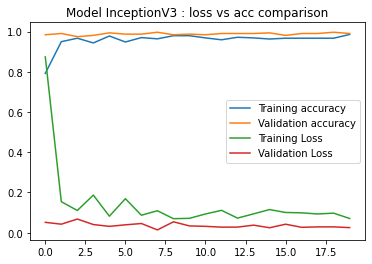

In [ ]:
acc = history4.history['accuracy']
val_acc = history4.history['val_accuracy']
loss = history4.history['loss']
val_loss = history4.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc,  label='Training accuracy')
plt.plot(epochs, val_acc, label='Validation accuracy')

plt.plot(epochs, loss,  label='Training Loss')
plt.plot(epochs, val_loss,  label='Validation Loss')
plt.title('Model InceptionV3 : loss vs acc comparison')
plt.legend()

plt.show()

In [ ]:
scores = model_inception.evaluate(test_generator_inception, verbose=1)
print(scores)
print("Accuracy: %.2f%%" % (scores[1]*100))
print("F1-Score: %.2f%%" % (scores[2]*100))
print("Precision: %.2f%%" % (scores[3]*100))
print("Recall: %.2f%%" % (scores[4]*100))

31/31 [==============================] - 2s 58ms/step - loss: 0.0326 - accuracy: 0.9889 - f1_m: 0.5146 - precision_m: 0.5151 - recall_m: 0.5141
[0.03263815492391586, 0.9889112710952759, 0.5145582556724548, 0.5150538086891174, 0.5141128897666931]
Accuracy: 98.89%
F1-Score: 51.46%
Precision: 51.51%
Recall: 51.41%


Saving Ema_mask.jpg to Ema_mask (9).jpg
[0.]
Ema_mask.jpg is With Mask


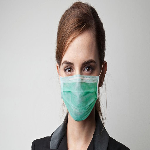

In [ ]:
import numpy as np
from google.colab import files
from keras.preprocessing import image
from IPython.display import Image
import cv2
from google.colab.patches import cv2_imshow

uploaded = files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path = '/content/' + fn
  img = image.load_img(path, target_size=(128, 128))
  
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model_inception.predict(images, batch_size=10)
  print(classes[0])
  if classes[0]>0.7:
    temp_path='/content/' + fn
    print(fn + " is Without Mask")
    img = cv2.imread(temp_path)
    imS=cv2.resize(img, (150, 150))
    cv2_imshow(imS)
  else:
    temp_path='/content/' + fn
    print(fn + " is With Mask")
    img = cv2.imread(temp_path)
    imS=cv2.resize(img, (150, 150))
    cv2_imshow(imS)


In [ ]:
model_inception.save('face_mask_inception.h5')

In [ ]:
scores = model.evaluate(test_generator, verbose=1)
print(scores)
print("Accuracy: %.2f%%" % (scores[1]*100))
print("F1-Score: %.2f%%" % (scores[2]*100))
print("Precision: %.2f%%" % (scores[3]*100))
print("Recall: %.2f%%" % (scores[4]*100))

13/13 [==============================] - 2s 126ms/step - loss: 0.1601 - accuracy: 0.9435 - f1_m: 0.9441 - precision_m: 0.9756 - recall_m: 0.9161
[0.16005374491214752, 0.9435483813285828, 0.9441019892692566, 0.9755946397781372, 0.9161236882209778]
Accuracy: 94.35%
F1-Score: 94.41%
Precision: 97.56%
Recall: 91.61%


In [ ]:
scores = model2.evaluate(test_generator_vgg, verbose=1)
print(scores)
print("Accuracy: %.2f%%" % (scores[1]*100))
print("F1-Score: %.2f%%" % (scores[2]*100))
print("Precision: %.2f%%" % (scores[3]*100))
print("Recall: %.2f%%" % (scores[4]*100))

31/31 [==============================] - 2s 67ms/step - loss: 0.0308 - accuracy: 0.9879 - f1_m: 0.5108 - precision_m: 0.5161 - recall_m: 0.5057
[0.030791210010647774, 0.9879032373428345, 0.5107687711715698, 0.5161290168762207, 0.5057355165481567]
Accuracy: 98.79%
F1-Score: 51.08%
Precision: 51.61%
Recall: 50.57%


In [ ]:
scores = model_resnet.evaluate(test_generator_resnet, verbose=1)
print(scores)
print("Accuracy: %.2f%%" % (scores[1]*100))
print("F1-Score: %.2f%%" % (scores[2]*100))
print("Precision: %.2f%%" % (scores[3]*100))
print("Recall: %.2f%%" % (scores[4]*100))

31/31 [==============================] - 2s 62ms/step - loss: 0.6090 - accuracy: 0.7067 - f1_m: 0.3992 - precision_m: 0.5161 - recall_m: 0.3303
[0.6089966893196106, 0.7066532373428345, 0.3991905450820923, 0.5161290168762207, 0.3302975594997406]
Accuracy: 70.67%
F1-Score: 39.92%
Precision: 51.61%
Recall: 33.03%


In [ ]:
scores = model_inception.evaluate(test_generator_inception, verbose=1)
print(scores)
print("Accuracy: %.2f%%" % (scores[1]*100))
print("F1-Score: %.2f%%" % (scores[2]*100))
print("Precision: %.2f%%" % (scores[3]*100))
print("Recall: %.2f%%" % (scores[4]*100))

31/31 [==============================] - 2s 60ms/step - loss: 0.0326 - accuracy: 0.9889 - f1_m: 0.5146 - precision_m: 0.5151 - recall_m: 0.5141
[0.03263815492391586, 0.9889112710952759, 0.5145582556724548, 0.5150538086891174, 0.5141128897666931]
Accuracy: 98.89%
F1-Score: 51.46%
Precision: 51.51%
Recall: 51.41%
